# Ventilator EDA - Break up into R=5  and C=10 subset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
train = pd.read_csv(r'F:\Sync\Work\Kaggle Competitions\Ventilator Pressure Prediction\Data\train.csv')
test = pd.read_csv(r'F:\Sync\Work\Kaggle Competitions\Ventilator Pressure Prediction\Data\test.csv')

In [3]:
trainR20= train[train.R==20]
trainR20C10 = trainR20[trainR20.C == 10]

In [4]:
trainR20C10.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
1440,1441,21,20,10,0.000000,6.979638,0,5.556283
1441,1442,21,20,10,0.033557,13.084509,0,6.259305
1442,1443,21,20,10,0.067382,12.875581,0,9.001088
1443,1444,21,20,10,0.100893,12.838315,0,10.969548
1444,1445,21,20,10,0.134798,13.333462,0,11.461663


In [5]:
# function to get single breath (id must exist...there are some that are missing)
def get_breath(df,my_id):
    # generate start stop points
    start = 80 * my_id
    stop = start + 80
    return df.iloc[start:stop,:]

In [6]:
def plot_breath(df,my_id):
    id1 = get_breath(df,my_id)
    r = id1.R.iloc[0]
    c = id1.C.iloc[0]
    plt.figure(figsize=(8,5))
    plt.plot(id1.pressure,label='pressure')
    plt.plot(id1.u_in,label='u_in')
    plt.plot(id1.u_out,label='u_out')
    plt.title(f'Pressure and u_in for Breath id={my_id}, R={r}, C={c}')
    plt.legend();

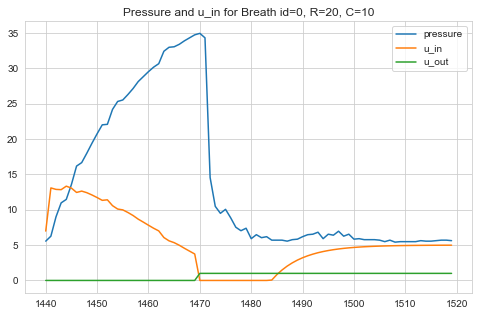

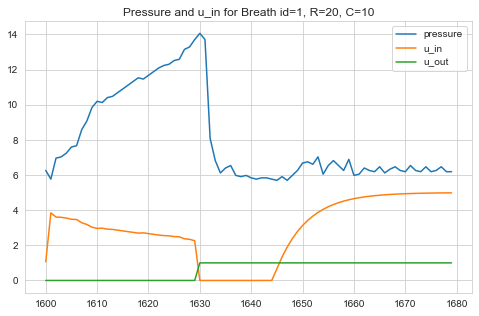

In [7]:
plot_breath(trainR20C10,0)
plot_breath(trainR20C10,1)

### R=50 and C=50 Analysis
* Pressure follows u_in curve pretty closely 
    * proportional control
    * but with a multiplier that doesn't seem consistent
* integration seems to hava a role
* so does derivative


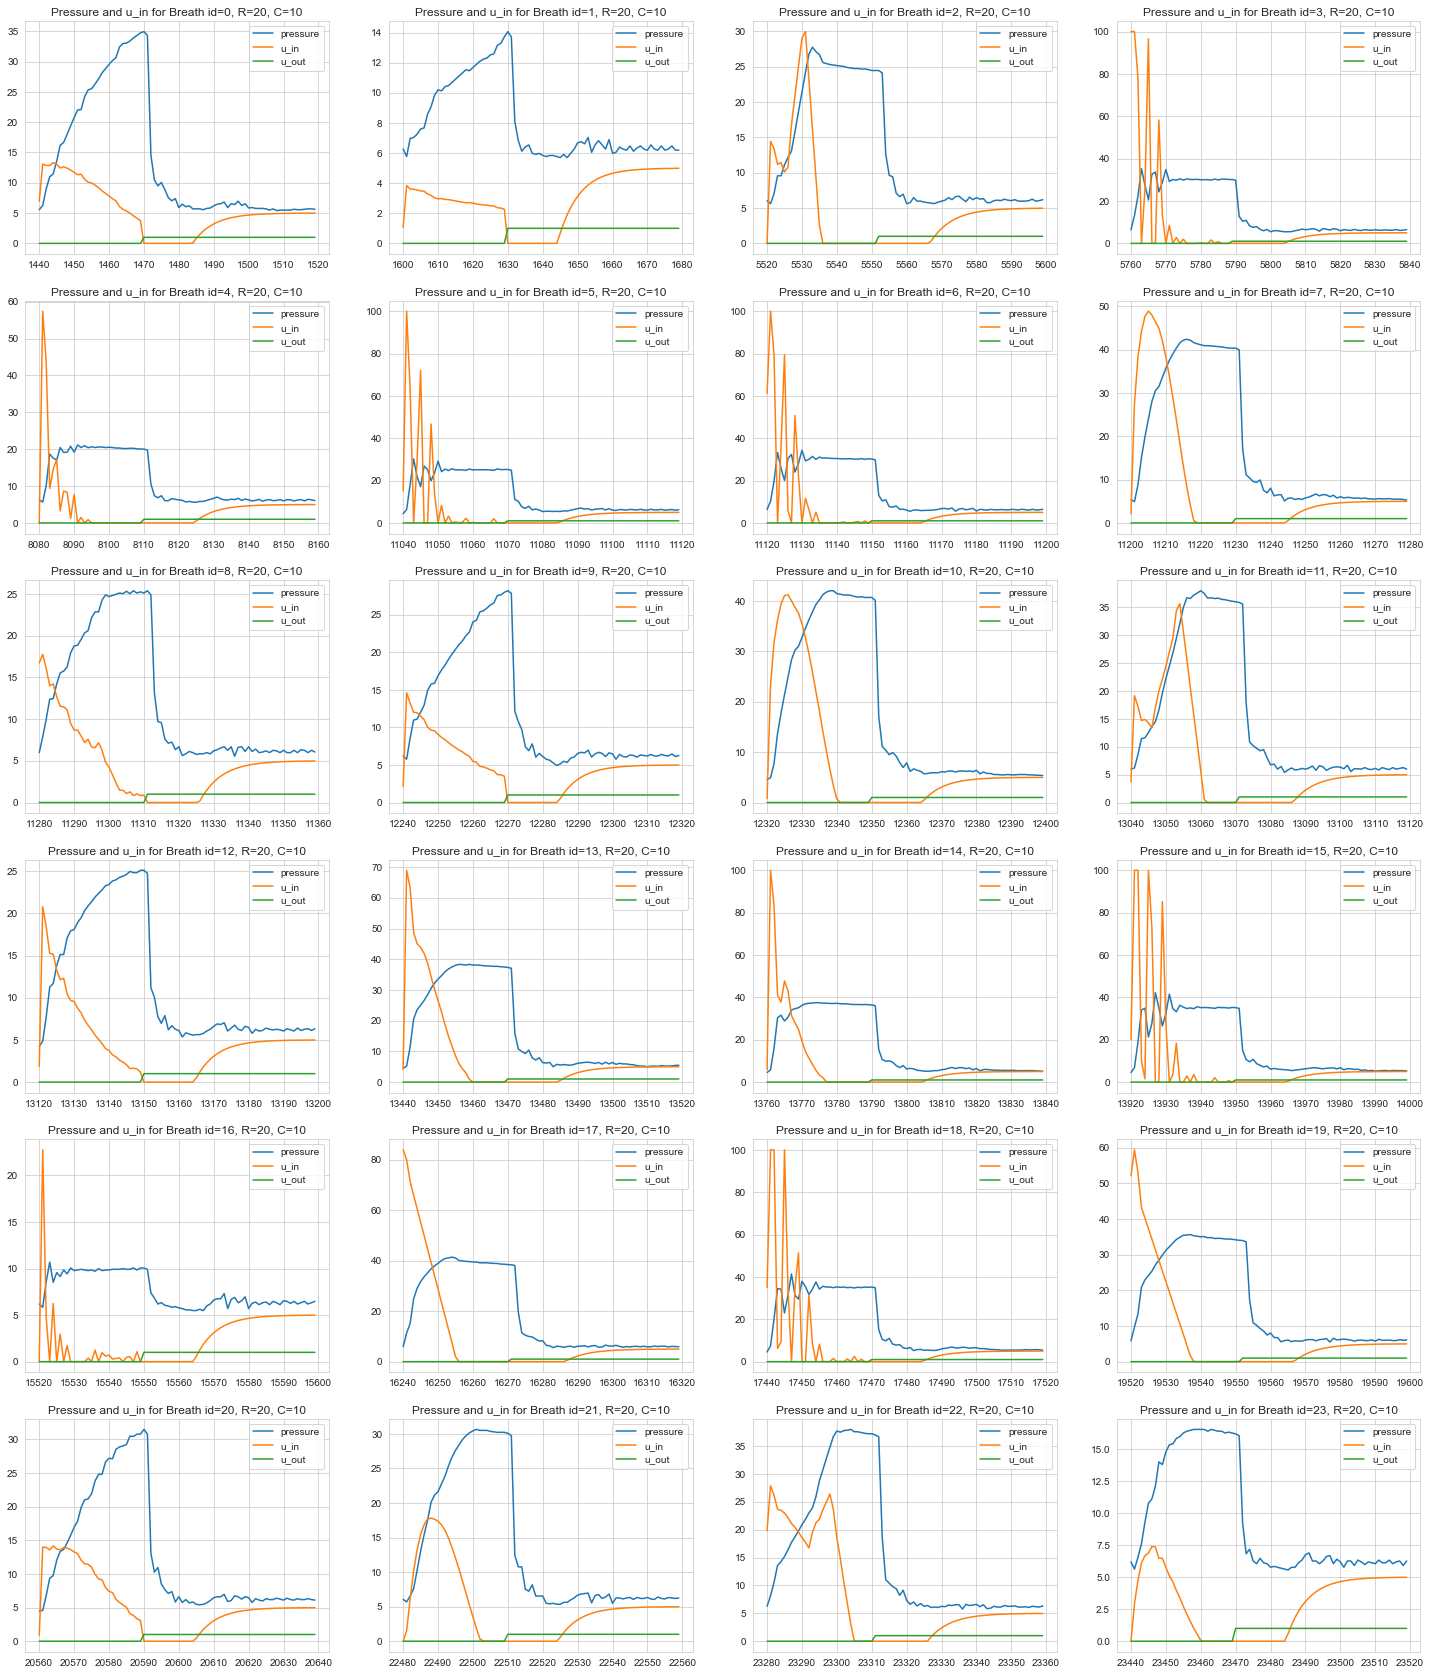

In [8]:
fig, ax = plt.subplots(6, 4, figsize=(25,30))
ax = ax.flatten()
for i in range(24):
    id1 = get_breath(trainR20C10,i)
    r = id1.R.iloc[0]
    c = id1.C.iloc[0]
    ax[i].plot(id1.pressure,label='pressure')
    ax[i].plot(id1.u_in,label='u_in')
    ax[i].plot(id1.u_out,label='u_out')
    ax[i].set_title(f'Pressure and u_in for Breath id={i}, R={r}, C={c}')
    ax[i].legend();
    
plt.savefig('R20C10_24Plots.png')

Plot integrated u_in vs. max pressure